In [1]:
import pandas as pd
import numpy as np
from numpy import argmax

In [ ]:
def function(row):
    id = row[0]
    class1_3 = row[1:4]
    class2_2 = row[4:6]
    class3_2 = row[6:8]
    class4_2 = row[8:10]
    class5_4 = row[10:14]
    class6_2 = row[14:16]
    class7_3 = row[16:19]
    class8_7 = row[19:26]
    class9_3 = row[26:29]
    class10_3 = row[29:32]
    class11_6 = row[32:38]
    string = ''
    if argmax(class1_3) == 0:
        string += 'E' #smooth
        if argmax(class7_3) == 0:
            string += '0'
        elif argmax(class7_3) == 1:
            string += '3'
        else:
            string += '6'
        
    elif argmax(class1_3) == 1:
        string += 'S' #feature or disk
        if argmax(class2_2) == 0:
            #string += '°' #edge on
            if argmax(class9_3) == 0:
                string += '0/a (edge on)' #round bulge
            elif argmax(class9_3) == 1: 
                string += 'B0/a (edge on)' #boxy bulge
            else:
                string += 'c/d (edge on)' # no bulge
        else:
            #string += '^' #edge off
            if argmax(class3_2) == 0:
                string += 'B' #bar
            else:
               string += '' # no visible bar
            
            if argmax(class4_2) == 0: #spiral arm pattern
                #string += 'spiral_'
                if argmax(class10_3) == 0:
                    string += 'a' #tightly wound arms
                elif argmax(class10_3) == 1:
                    string += 'b' #moderately wound arms
                else:
                    string += 'c' #loosely wound arms

                if argmax(class11_6) == 0: #1 arm ## togliere le braccia
                    string += '1'
                elif argmax(class11_6) == 1: #2 arms
                    string += '2'
                elif argmax(class11_6) == 2: #3 arms
                    string += '3'
                elif argmax(class11_6) == 3: #4 arms
                    string += '4'
                elif argmax(class11_6) == 4: #4+ arms 
                    string += '4+'
                else: #cant tell
                    string += '?'
            else:
                string += '0'
            
            if argmax(class5_4) == 0:# no bulge
                string += 'nob_'
            elif argmax(class5_4) == 1: #just noticeable bulge
                string += 'b_'
            elif argmax(class5_4) == 2: #obvious bulge
                string += 'b2_'
            else: #dominant bulge
                string += 'b3_'

        if argmax(class6_2) == 0: #anything odd
            if argmax(class8_7) == 0:
                string += '(r)' #ring
            elif argmax(class8_7) == 1:
                string += '(l)' #lens/arc
            elif argmax(class8_7) == 2:
                string += '(pec)' #disturbed
            elif argmax(class8_7) == 3:
                string += '(irr)'  #irregular
            elif argmax(class8_7) == 4:
                string += '(other)'
            elif argmax(class8_7) == 5:
                string += '(merger)'
            else:
                string += '(dust)'

    else:
        string += 'A' #star or artifact
    return string


b


## L'incertezza maggiorre sta nella prima domanda, 


    

def classifier2(row):
    id = row[0]
    class1_3 = row[1:4]
    class2_2 = row[4:6]
    class3_2 = row[6:8]
    class4_2 = row[8:10]
    class5_4 = row[10:14]
    class6_2 = row[14:16]
    class7_3 = row[16:19]
    class8_7 = row[19:26]
    class9_3 = row[26:29]
    class10_3 =row[29:32]
    class11_6 =row[32:38]
    
    if argmax(class1_3) == 0:
        string = 'E' #smooth
        if argmax(class7_3) == 0:
            string += '0' #sphere
        elif argmax(class7_3) == 1:
            string += '3' #in between
        elif argmax(class7_3) == 2:
            string += '6' #cigar
        else:
            string += '3' # if incertain must be in between
        
    elif argmax(class1_3) == 1:
        string = 'S'
        if argmax(class2_2) == 0:
            if argmax(class9_3) == 0:
                string += '0/a (edge on)'
            elif argmax(class9_3) == 1:
                string += 'B0/a (edge on)'
            elif argmax(class9_3) == 2:
                string += 'c/d (edge on)'
            else:
                string += '(edge on)'
        elif argmax(class2_2) == 1:
            if argmax(class3_2) == 0:
                string += 'B'
            elif argmax(class3_2) == 1:
                string += 'A'
            else:
                pass

            if argmax(class4_2) == 0:
                string += ''
                if argmax(class5_4) == 0:
                    string += 'd'
                elif argmax(class5_4) == 1:
                    string += 'c'
                elif argmax(class5_4) == 2:
                    string += 'b'
                else:
                    string += 'a'
            else:
                string += '0'
                if string == 'SB0':
                    string = 'S0B'
                if string == 'SA0':
                    string = 'S0A'
                else:
                    pass

    elif argmax(class1_3) == 2:
        string = 'A' #star or artifact
    return string
     

In [2]:
path = '../data/training/training_solutions_rev1.csv' #path è universale
dataframe = pd.read_csv(path, sep=',', index_col=False) 
df = dataframe#.sample(frac=0.05, random_state=1) 

In [16]:
a =df.apply(classifier2, axis=1, raw=True, result_type='expand') ## output is a Series
df = pd.concat([df.iloc[:,0],a], axis=1)
df

GalaxyID    0
0        100008  SAb
1        100023  SBc
2        100053   E3
3        100078   E0
4        100090   E0
...         ...  ...
61573    999948   E3
61574    999950   E3
61575    999958  S0A
61576    999964  SAb
61577    999967   E3

[61578 rows x 2 columns]

<Axes: >

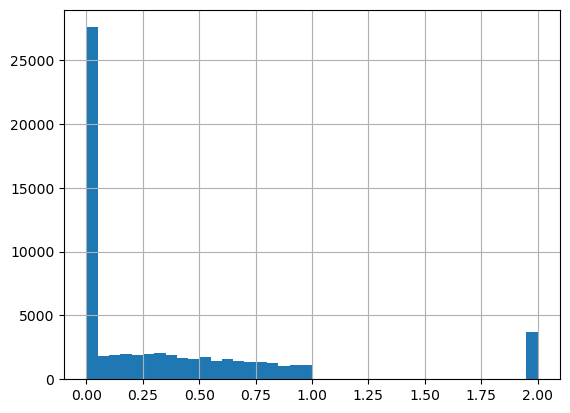

In [ ]:
dataframe[['Class4.1','Class4.2']].apply(lambda x:  1-((max(x)-min(x))/(max(x)+0.001)) if np.any(x) else 2 , axis=1).hist(bins=40)
diocanegg 

In [ ]:
def bigger_clear(array, whichone):
    sorted_array = np.sort(array)
    if sorted_array[-1] - sorted_array[-2] > np.sum(array)*0.1:
        return array
    else:
        return np.zeros(len(array))

In [34]:
c=np.array([1,1,1])
np.any(c)

True

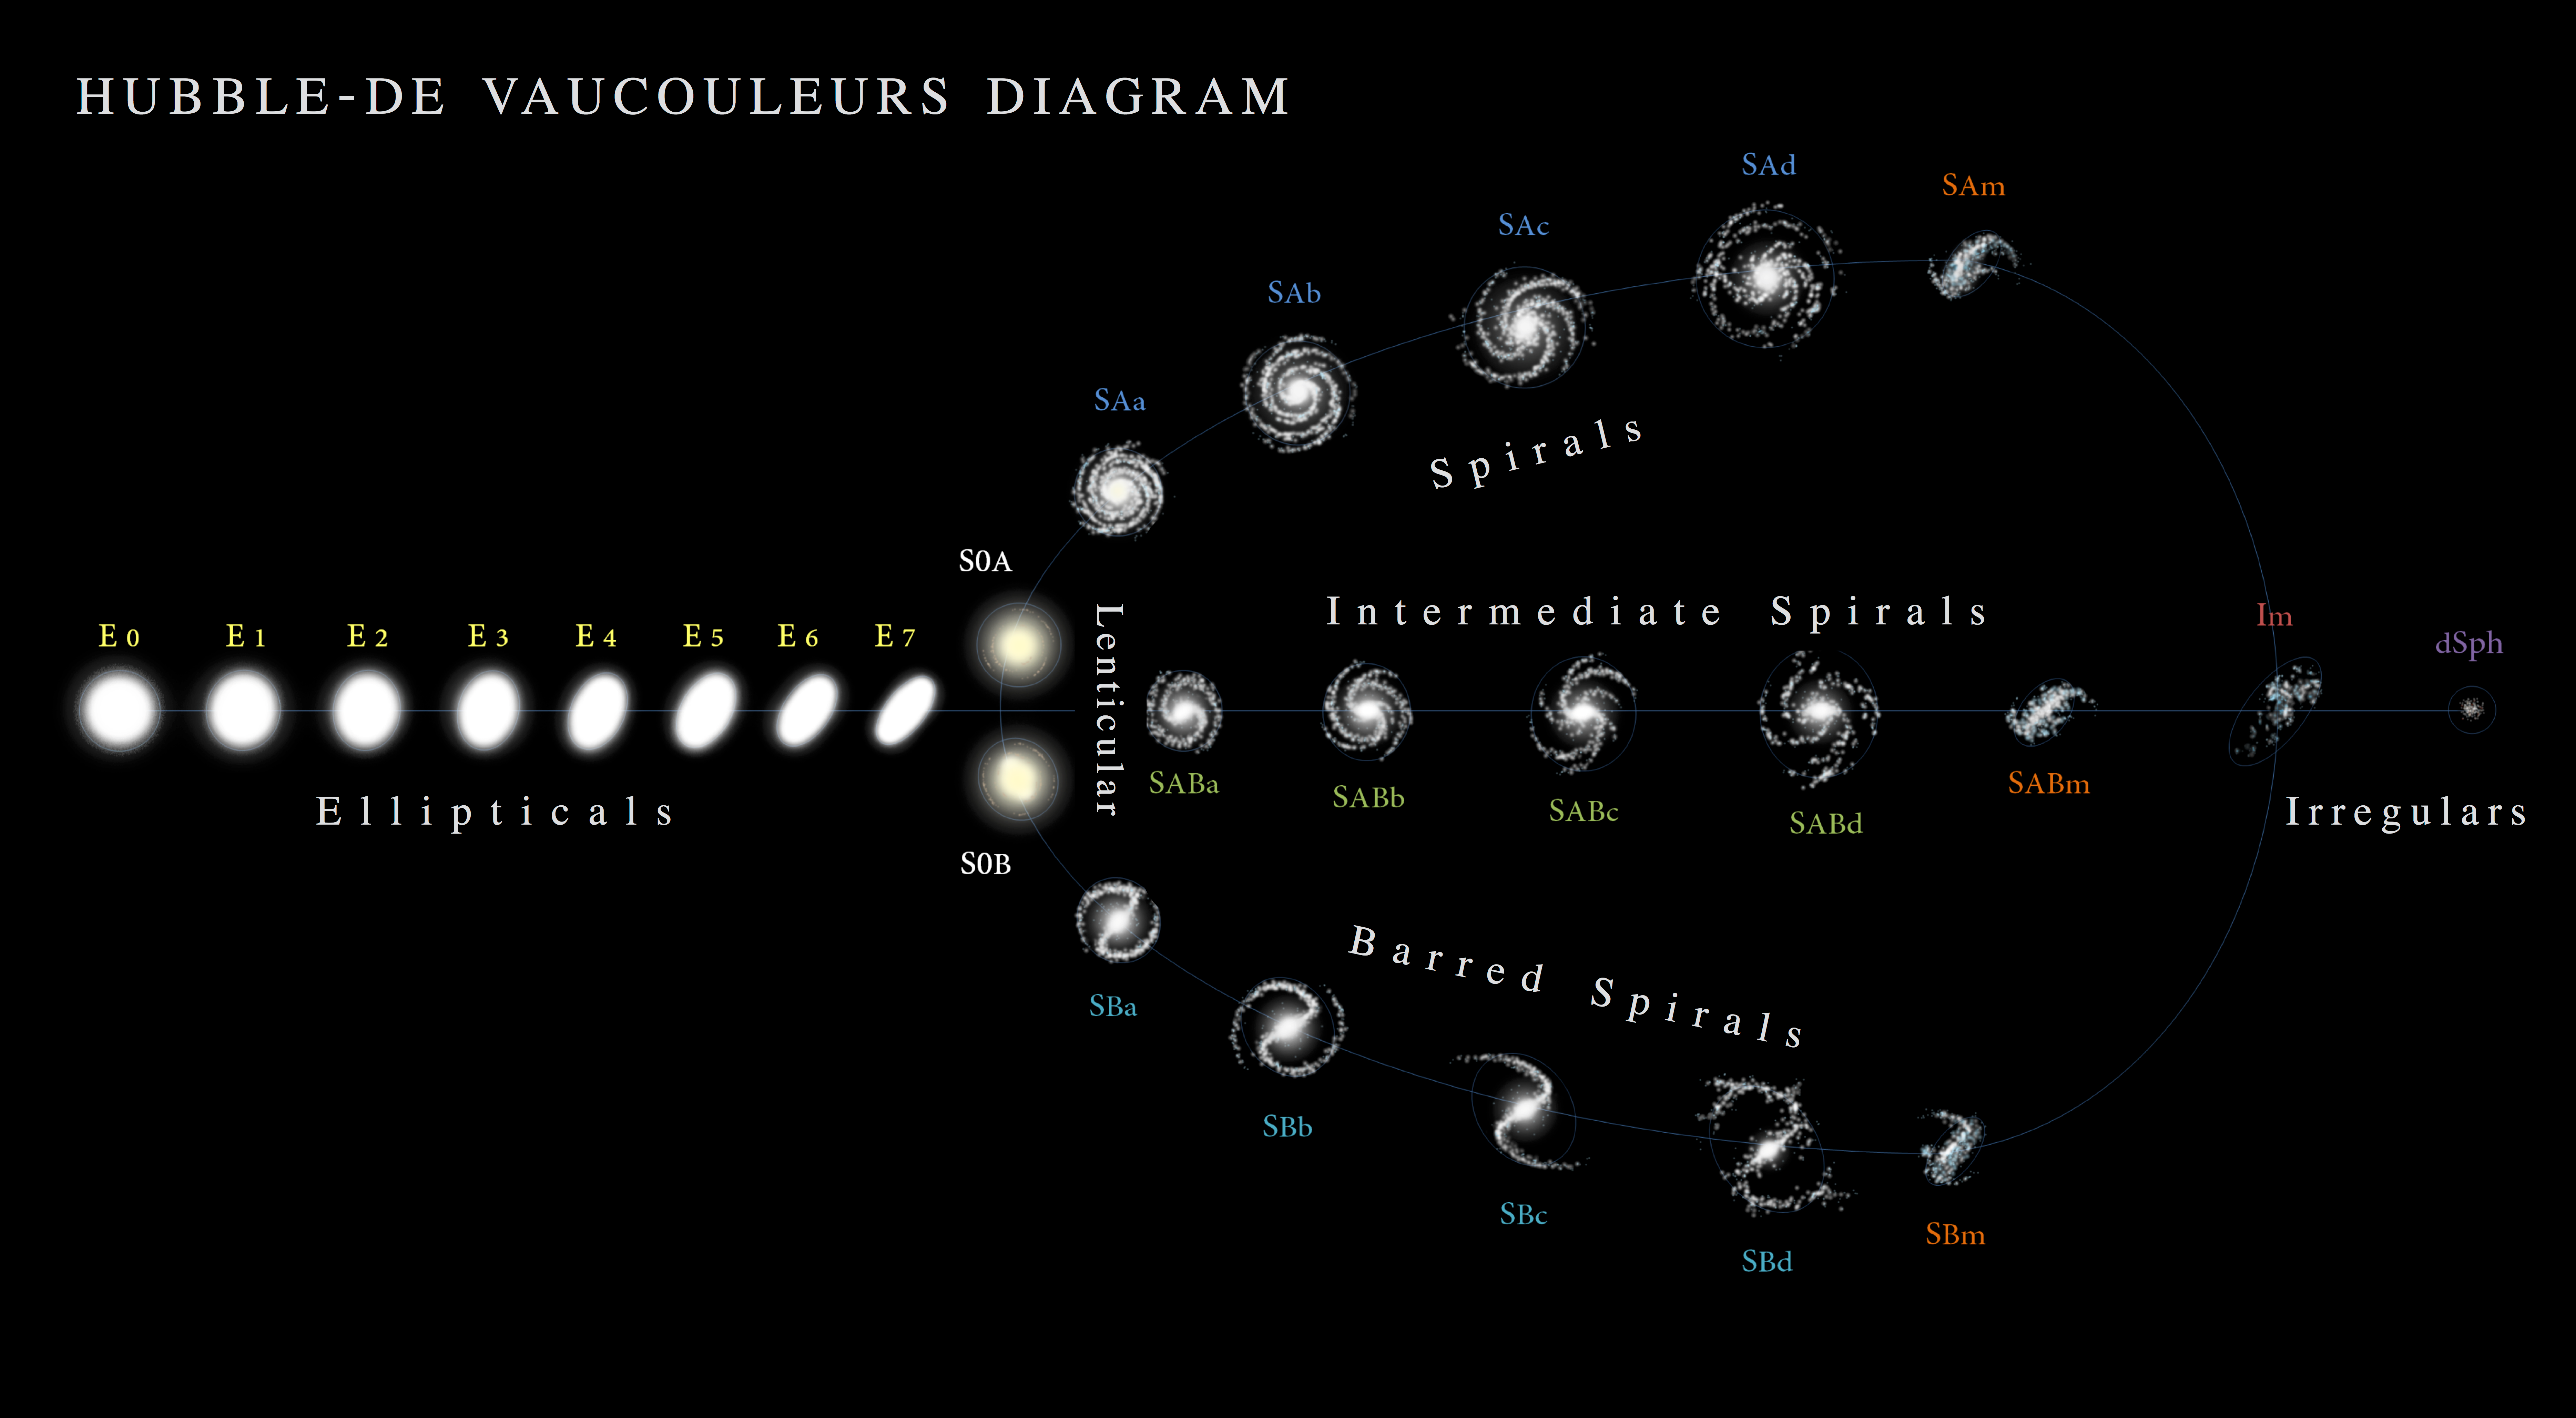